# Model `AssoIter`

An example of prediction task using `AssoIter` with `RatioSplit`.

In the paper, `AssoIter` uses error as metric during refinement. The improvement upon `Asso` is not guaranteed. Try to use the cover score metric by modifying `AssoIter`.

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [2]:
from datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


In [3]:
from datasets import RatioSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test


[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 7527
[I]   val_size     : 1076
[I]   test_size    : 2151
[I]   seed         : 1997


[I] tau          : 0.15
[I] k            : 5
[I] tol          : 0
[I] w_fp         : 0.2
[I] w_fn         : None
[I] verbose      : False
[I] display      : False
[I] task         : prediction


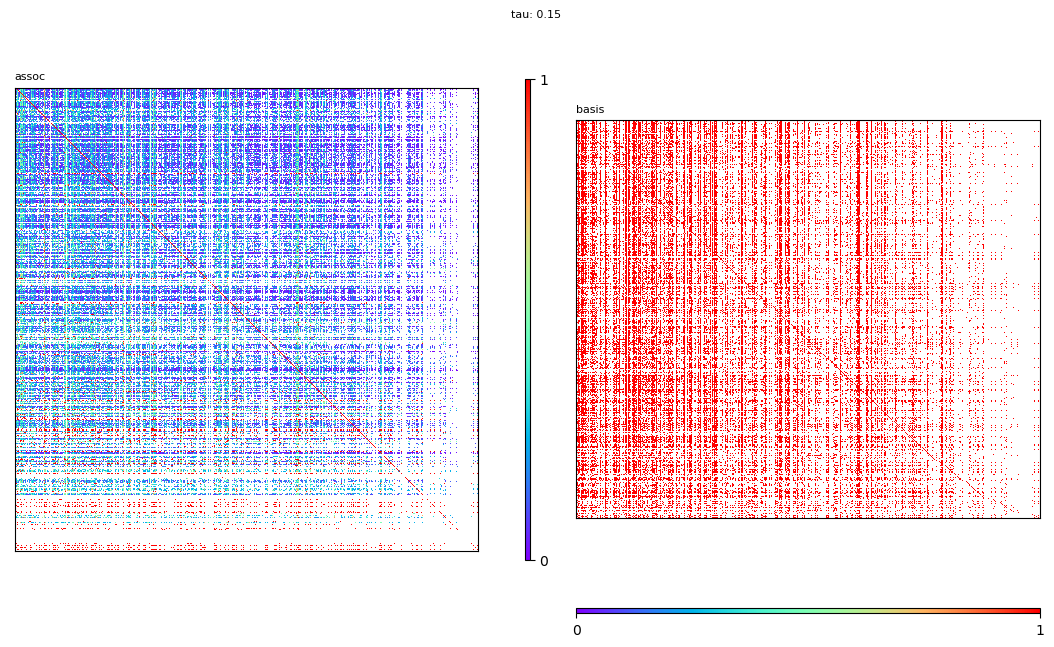

0 <class 'scipy.sparse._lil.lil_matrix'> (300, 5)


1 <class 'scipy.sparse._lil.lil_matrix'> (300, 5)


2 <class 'scipy.sparse._lil.lil_matrix'> (300, 5)


3 <class 'scipy.sparse._lil.lil_matrix'> (300, 5)


4 <class 'scipy.sparse._lil.lil_matrix'> (300, 5)


100%|██████████| 5/5 [00:12<00:00,  2.54s/it]

[W] Stopped in advance: Reach requested factor


train                                                \
                              0                                                 
                time  k   score score_0.5 desc_len      shape    TP       TPR   
0  12/06/24 01:05:25  0  1219.0   -1541.0  10801.0  [100, 92]  3059  0.406404   
1  12/06/24 01:05:28  1  1422.0   -2046.0  11940.0  [100, 29]  3734  0.496081   
2  12/06/24 01:05:30  2  1572.4   -2270.0  12574.0  [16, 170]  4134  0.549223   
3  12/06/24 01:05:33  3  1638.8   -2413.0  12973.0   [25, 88]  4340  0.576591   
4  12/06/24 01:05:35  4  1698.6   -2416.5  13189.0   [2, 207]  4442  0.590142   

                                                                      \
                                                                       
    FP FPR      FN       FNR       ERR       ACC    Recall Precision   
0  0.0   1  4468.0  0.593596  0.593596  0.406404  0.406404       1.0   
1  0.0   1  3793.0  0.503919  0.503919  0.496081  0.496081       1.0   
2  0.0   1  3393.0  0.450777  0.450777  0.549223  0.549223       1.0   
3  0.0   1  3187.0  0.423409  0.423409  0.576591  0.576591       1.0   
4  0.0   1  3085.0  0.409858  0.409858  0.590142  0.590142       1.0   

             val                                                          \
               0                                                           
         F1   TP       TPR   FP FPR     FN       FNR       ERR       ACC   
0  0.577933  429  0.398699  0.0   1  647.0  0.601301  0.601301  0.398699   
1  0.663174  499  0.463755  0.0   1  577.0  0.536245  0.536245  0.463755   
2  0.709030  539  0.500929  0.0   1  537.0  0.499071  0.499071  0.500929   
3  0.731440  559  0.519517  0.0   1  517.0  0.480483  0.480483  0.519517   
4  0.742251  565  0.525093  0.0   1  511.0  0.474907  0.474907  0.525093   

                                 test                                       \
                                    0                                        
     Recall Precision        F1    TP       TPR   FP FPR      FN       FNR   
0  0.398699       1.0  0.570100   833  0.387262  0.0   1  1318.0  0.612738   
1  0.463755       1.0  0.633651   972  0.451883  0.0   1  1179.0  0.548117   
2  0.500929       1.0  0.667492  1049  0.487680  0.0   1  1102.0  0.512320   
3  0.519517       1.0  0.683792  1113  0.517434  0.0   1  1038.0  0.482566   
4  0.525093       1.0  0.688605  1116  0.518828  0.0   1  1035.0  0.481172   

                                                     
                                                     
        ERR       ACC    Recall Precision        F1  
0  0.612738  0.387262  0.387262       1.0  0.558311  
1  0.548117  0.451883  0.451883       1.0  0.622478  
2  0.512320  0.487680  0.487680       1.0  0.655625  
3  0.482566  0.517434  0.517434       1.0  0.681985  
4  0.481172  0.518828  0.518828       1.0  0.683196

<Figure size 640x480 with 0 Axes>

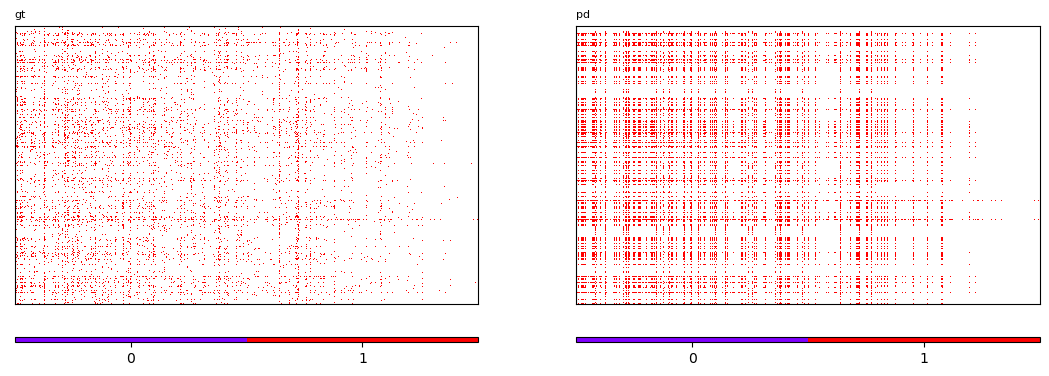

[I] model saved as: 24-06-12_01-05-36_Asso.pickle


<Figure size 640x480 with 0 Axes>

In [4]:
from models import Asso

k = 5
tau = 0.15
w_fp = 0.2

model = Asso(k=k, tau=tau, w_fp=w_fp)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=False)

[I] model        : <models.Asso.Asso object at 0x000002B13DA39250>
[I] w_fp         : 0.2
[I] w_fn         : None
[I] verbose      : False
[I] display      : False
[I] task         : prediction
[I] Refined column i: 0, error: 0.0824 -> 0.0792, score: 1698.60 -> 1749.00.
[I] Refined column i: 1, error: 0.0792 -> 0.0790, score: 1749.00 -> 1755.00.
[I] Refined column i: 2, error: 0.0790 -> 0.0784, score: 1755.00 -> 1761.80.
[I] Refined column i: 3, error: 0.0784 -> 0.0782, score: 1761.80 -> 1766.60.
[I] Skipped column i: 4.
[I] Refined column i: 0, error: 0.0782 -> 0.0782, score: 1766.60 -> 1766.80.
[I] Skipped column i: 1.
[I] Skipped column i: 2.
[I] Skipped column i: 3.
[I] Skipped column i: 4.
[I] Skipped column i: 0.
[I] Error stops decreasing.


train                                                \
                              0                                                 
                time  k   score score_0.5 desc_len      shape    TP       TPR   
0  12/06/24 01:05:25  0  1219.0   -1541.0  10801.0  [100, 92]  3059  0.406404   
1  12/06/24 01:05:28  1  1422.0   -2046.0  11940.0  [100, 29]  3734  0.496081   
2  12/06/24 01:05:30  2  1572.4   -2270.0  12574.0  [16, 170]  4134  0.549223   
3  12/06/24 01:05:33  3  1638.8   -2413.0  12973.0   [25, 88]  4340  0.576591   
4  12/06/24 01:05:35  4  1698.6   -2416.5  13189.0   [2, 207]  4442  0.590142   

                                                                      \
                                                                       
    FP FPR      FN       FNR       ERR       ACC    Recall Precision   
0  0.0   1  4468.0  0.593596  0.593596  0.406404  0.406404       1.0   
1  0.0   1  3793.0  0.503919  0.503919  0.496081  0.496081       1.0   
2  0.0   1  3393.0  0.450777  0.450777  0.549223  0.549223       1.0   
3  0.0   1  3187.0  0.423409  0.423409  0.576591  0.576591       1.0   
4  0.0   1  3085.0  0.409858  0.409858  0.590142  0.590142       1.0   

             val                                                          \
               0                                                           
         F1   TP       TPR   FP FPR     FN       FNR       ERR       ACC   
0  0.577933  429  0.398699  0.0   1  647.0  0.601301  0.601301  0.398699   
1  0.663174  499  0.463755  0.0   1  577.0  0.536245  0.536245  0.463755   
2  0.709030  539  0.500929  0.0   1  537.0  0.499071  0.499071  0.500929   
3  0.731440  559  0.519517  0.0   1  517.0  0.480483  0.480483  0.519517   
4  0.742251  565  0.525093  0.0   1  511.0  0.474907  0.474907  0.525093   

                                 test                                       \
                                    0                                        
     Recall Precision        F1    TP       TPR   FP FPR      FN       FNR   
0  0.398699       1.0  0.570100   833  0.387262  0.0   1  1318.0  0.612738   
1  0.463755       1.0  0.633651   972  0.451883  0.0   1  1179.0  0.548117   
2  0.500929       1.0  0.667492  1049  0.487680  0.0   1  1102.0  0.512320   
3  0.519517       1.0  0.683792  1113  0.517434  0.0   1  1038.0  0.482566   
4  0.525093       1.0  0.688605  1116  0.518828  0.0   1  1035.0  0.481172   

                                                     
                                                     
        ERR       ACC    Recall Precision        F1  
0  0.612738  0.387262  0.387262       1.0  0.558311  
1  0.548117  0.451883  0.451883       1.0  0.622478  
2  0.512320  0.487680  0.487680       1.0  0.655625  
3  0.482566  0.517434  0.517434       1.0  0.681985  
4  0.481172  0.518828  0.518828       1.0  0.683196

train                                          \
                              0                                           
                time  k   score     error    Recall Precision  Accuracy   
0  12/06/24 01:07:21  0  1749.0  0.079220  0.580178       1.0  0.580178   
1  12/06/24 01:07:21  1  1755.0  0.078980  0.579912       1.0  0.579912   
2  12/06/24 01:07:21  2  1761.8  0.078393  0.577521       1.0  0.577521   
3  12/06/24 01:07:22  3  1766.6  0.078233  0.577521       1.0  0.577521   
4  12/06/24 01:07:22  0  1766.8  0.078227  0.577521       1.0  0.577521   

                  val                                    test            \
                    0                                       0             
         F1    Recall Precision  Accuracy        F1    Recall Precision   
0  0.734320  0.511152       1.0  0.511152  0.676507  0.503952       1.0   
1  0.734107  0.509294       1.0  0.509294  0.674877  0.502092       1.0   
2  0.732188  0.505576       1.0  0.505576  0.671605  0.496978       1.0   
3  0.732188  0.503717       1.0  0.503717  0.669963  0.493724       1.0   
4  0.732188  0.503717       1.0  0.503717  0.669963  0.493724       1.0   

                       
                       
   Accuracy        F1  
0  0.503952  0.670170  
1  0.502092  0.668524  
2  0.496978  0.663975  
3  0.493724  0.661064  
4  0.493724  0.661064

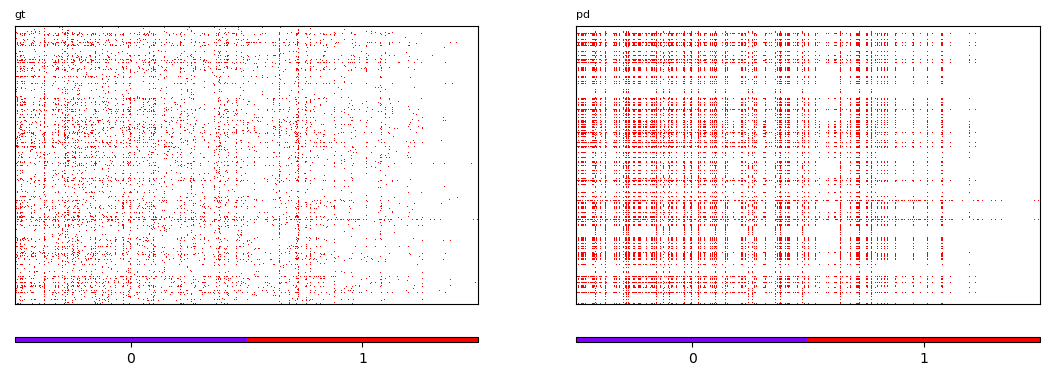

[I] model saved as: 24-06-12_01-07-23_AssoIter.pickle


<Figure size 640x480 with 0 Axes>

In [6]:
from models import AssoIter

model_assoiter = AssoIter(model=model, w_fp=w_fp)
model_assoiter.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=False)